In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
                'Dataset/dataset/training_set',
                target_size = (64,64),
                batch_size = 32,
                class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
                'Dataset/dataset/test_set',
                target_size = (64,64),
                batch_size = 32,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [16]:
cnn = tf.keras.models.Sequential()

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
250/250 [==============================] - 40s 161ms/step - loss: 0.6832 - accuracy: 0.5555 - val_loss: 0.6723 - val_accuracy: 0.5945
Epoch 2/100
250/250 [==============================] - 34s 135ms/step - loss: 0.6296 - accuracy: 0.6446 - val_loss: 0.5852 - val_accuracy: 0.6940
Epoch 3/100
250/250 [==============================] - 34s 136ms/step - loss: 0.5701 - accuracy: 0.6988 - val_loss: 0.5539 - val_accuracy: 0.7195
Epoch 4/100
250/250 [==============================] - 34s 136ms/step - loss: 0.5332 - accuracy: 0.7324 - val_loss: 0.5340 - val_accuracy: 0.7330
Epoch 5/100
250/250 [==============================] - 34s 137ms/step - loss: 0.5084 - accuracy: 0.7511 - val_loss: 0.4888 - val_accuracy: 0.7620
Epoch 6/100
250/250 [==============================] - 35s 140ms/step - loss: 0.4871 - accuracy: 0.7656 - val_loss: 0.4746 - val_accuracy: 0.7765
Epoch 7/100
250/250 [==============================] - 35s 139ms/step - loss: 0.4751 - accuracy: 0.7709 - val_loss: 0.4948 -

In [48]:
cnn.save("model.h5")

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('cat-toes-paw-number-paws-tiger-tabby.jpg', target_size = [64,64])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [42]:
print(prediction)

dog


In [4]:
from tensorflow import keras
model = keras.models.load_model('model/model.h5')

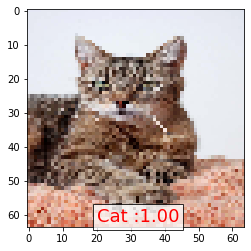

In [5]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('cat-toes-paw-number-paws-tiger-tabby.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

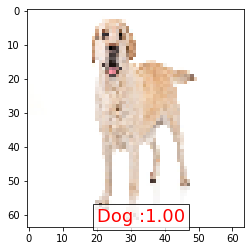

In [64]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('Yellow-Labrador-Retriever.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                